In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection  import chi2
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.shape

(8523, 12)

In [5]:
test.shape

(5681, 11)

In [6]:
train.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [7]:
# To find the number of sales <=4500
train.loc[train['Item_Outlet_Sales'] <= 4500].shape

(7625, 12)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

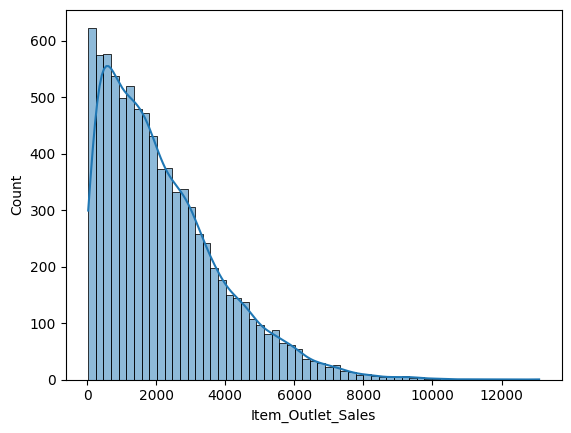

In [8]:
#To find the number of sales and its count
sns.histplot(train['Item_Outlet_Sales'],kde = True)

<Axes: ylabel='Item_Visibility'>

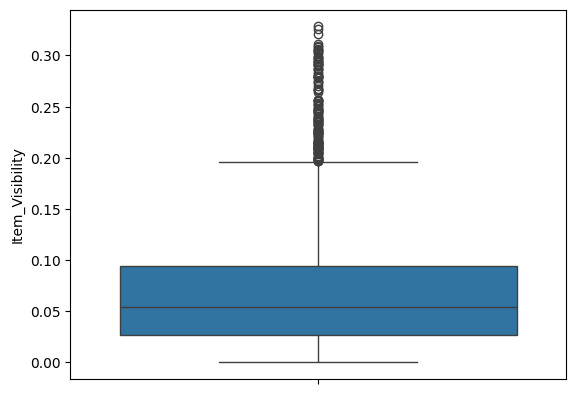

In [9]:
sns.boxplot(train['Item_Visibility'])

In [10]:
num_cols = train.select_dtypes(include = np.number).columns.tolist()
num_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

<Axes: ylabel='Item_Weight'>

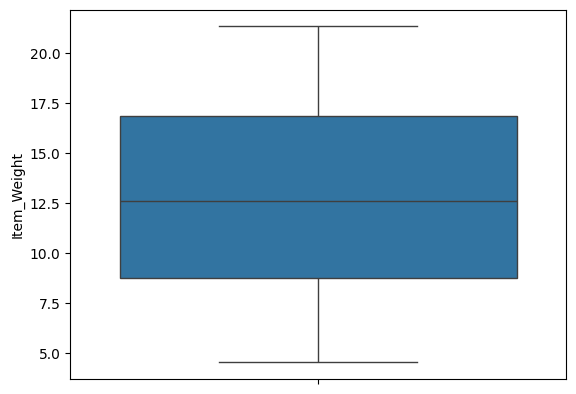

In [11]:
#boxplot to see outliers
sns.boxplot(train['Item_Weight'])

<Axes: ylabel='Item_MRP'>

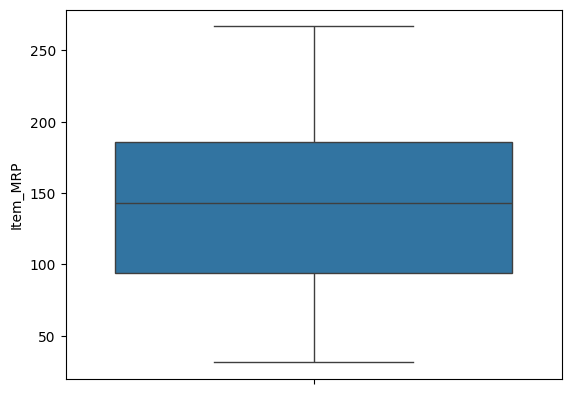

In [12]:
sns.boxplot(train['Item_MRP'])

<Axes: ylabel='Outlet_Establishment_Year'>

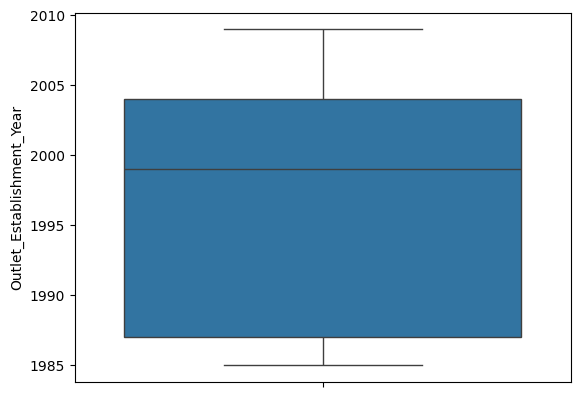

In [13]:
sns.boxplot(train['Outlet_Establishment_Year'])

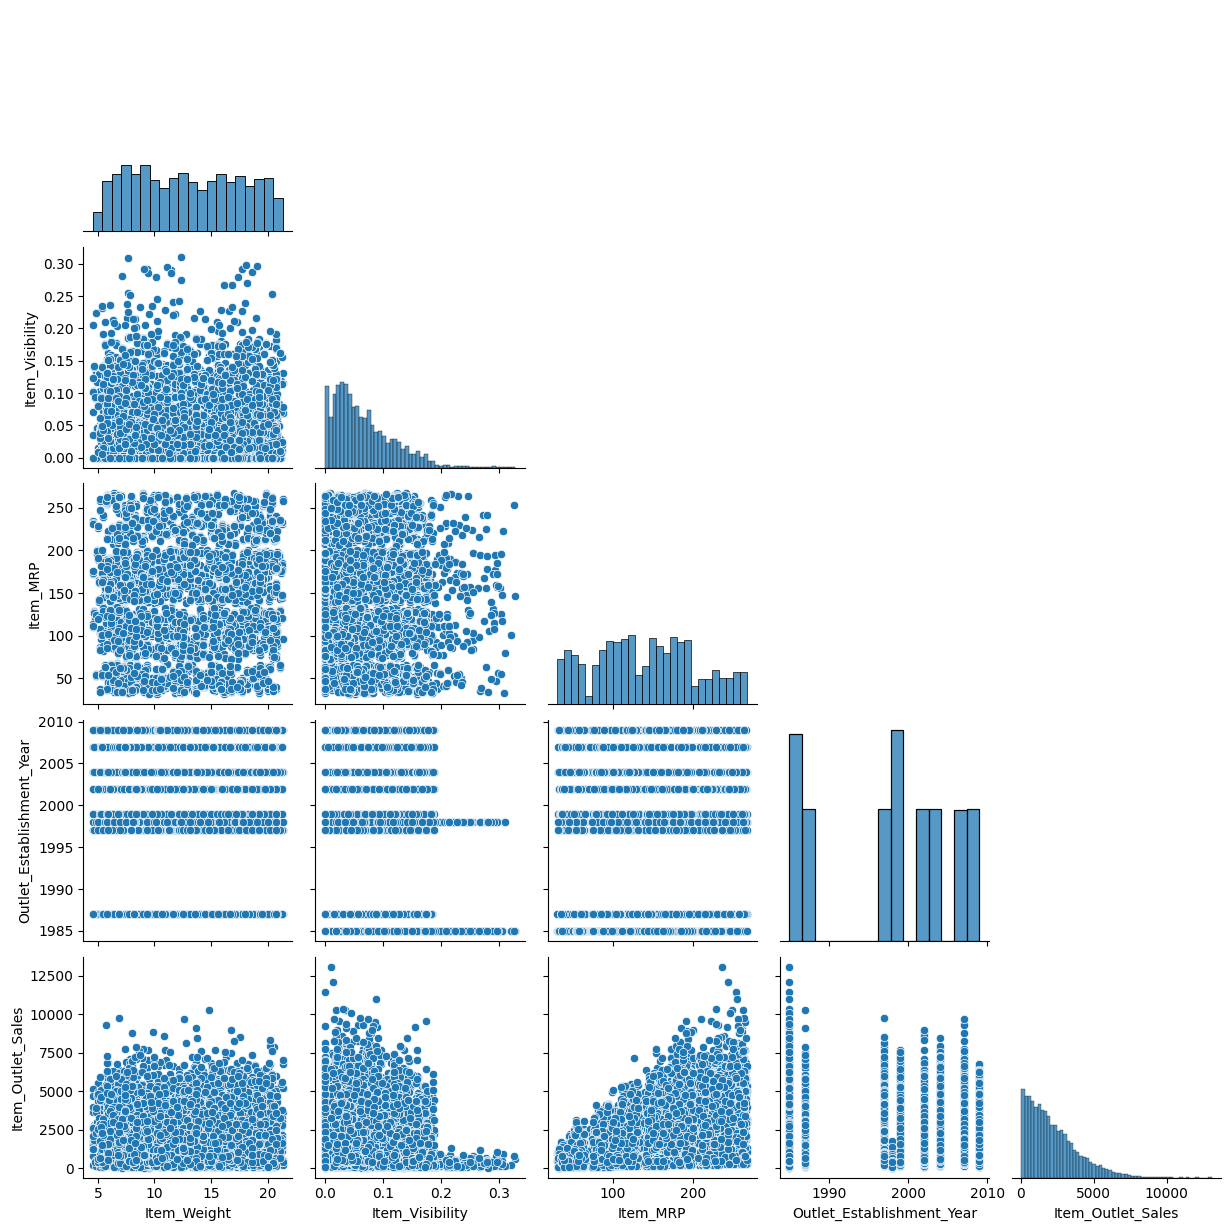

In [14]:
sns.pairplot(train[num_cols],corner=True) #corner true/without that - explore

In [15]:
#1. Strong linear relationship (MRP-Sales)
#2. Weak relationships (visibility and weight vs Sales)
#3. Distributions along the diagonal reveal right-skewness.. WE can do log-transformations before modelling for this..

In [16]:
#Preprocessings:
#1. LF - Regular fix
#2. Itemweight - Missing values - MEan
#3. Outlet_size - Missing values - Mode
#4. Item_Visibility - fix 0s with Median

In [17]:
#replace Item_Fat_Content column values from Low Fat to LF
#find unique values of a columns

#copy train into train_copy
train_copy = train.copy()
test_copy = test.copy()



In [18]:
train['Item_Fat_Content'].unique()
#unique count
train['Item_Fat_Content'].nunique()
# column unique values and its count
train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [19]:


#preprocess Item Fa content
#train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('LF','Low Fat')
#train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('low fat','Low Fat')
#train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg','Regular')

In [ ]:
#train['Item_Fat_Content'].value_counts()

In [20]:
#Preprocess Item_Weight column
#train['Item_Weight'].value_counts()
#mean of Item_Weight column value


In [21]:
#train['Item_Weight'].mean()
#replace Item_Weight colum null values with mean
#train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [22]:
# train Item_Weight column find any null values
#train['Item_Weight'].isna().sum()

In [23]:
#train.isna().sum()

In [24]:
#train Outlet_Size column isna
#train['Outlet_Size'].isna().sum()

In [25]:
#mode of train Outlet_Size
#train['Outlet_Size'].mode()


In [26]:
#train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [27]:
#train['Outlet_Size'].isna().sum()

In [28]:
#train Item_Visibility column median
#train['Item_Visibility'].median()


In [29]:
#train Item_Visibility find column count contains 0
#train['Item_Visibility'].value_counts()


In [30]:
#train['Item_Visibility'] = train['Item_Visibility'].replace(0,train['Item_Visibility'].median())

In [31]:
#train['Item_Visibility'].value_counts()
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [32]:
CURRENT_YEAR = 2013
for df in [train, test]:
    # Standardize labels
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

    # Fill missing old method of filling
    #df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True) #Global Mean fix - GroupBy Appropriate categories and take group median Assignment
    #df['Item_Visibility'] = df['Item_Visibility'].replace(0, df['Item_Visibility'].median()) #Global Median fix - GroupBy Appropriate categories and take group median Assignment
    #df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True) #Global Mean fix - GroupBy Appropriate categories and take group median Assignment
    # new method of filling

    #df['Item_Visibility'] = df['Item_Visibility'].replace(0,df.groupby('Item_Identifier')['Item_Visibility'].median())
    # medians = df.groupby('Item_Identifier')['Item_Visibility'].transform('median')
    # print(medians)

    # # Then replace zeros with the corresponding group median
    # df['Item_Visibility'] = df['Item_Visibility'].mask(df['Item_Visibility'] == 0, medians)

    medians = df.groupby('Item_Identifier')['Item_Visibility'].transform('median')
    print(medians)
    df['Item_Visibility'] = np.where(df['Item_Visibility'] == 0, medians, df['Item_Visibility'])
    mean = df.groupby('Item_Identifier')['Item_Weight'].transform("mean")
    print("mean",mean)
    #df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform("mean"), inplace = True)
    df['Item_Weight'] =  df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform("mean"))
    df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
    #df['target_column'] = df['target_column'].fillna(df.groupby('group_column')['target_column'].transform('mean'))
    df['Outlet_Size'] = df["Outlet_Size"].replace("", np.nan)
    size_mode = df.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df["Outlet_Size"] = df.set_index(["Outlet_Type"])['Outlet_Size'].fillna(size_mode).reset_index(drop=True)
    df["Outlet_Size"] = df.groupby("Outlet_Type")["Outlet_Size"].transform(lambda x: x.fillna(x.mode()[0]))

    df['Item_Category'] = df['Item_Identifier'].apply(lambda x: x[:2])
    df['Outlet_age'] = CURRENT_YEAR - df['Outlet_Establishment_Year']
    df['Visibility_MeanRatio'] = df['Item_Visibility'] / df['Item_Visibility'].mean() #Still prossible grouping but here both seem fine - Grouping by the outlet visibility
    #Categorizing item visibility - Low / High
    df['Outlet_Location_Score'] = df['Outlet_Location_Type'].map({"Tier 1":1,"Tier 2":2,"Tier 3":3})
    df['High_MRP_Flag'] = (df['Item_MRP'] > df['Item_MRP'].median()).astype(int)

0       0.016051
1       0.019219
2       0.016768
3       0.022861
4       0.006590
          ...   
8518    0.056932
8519    0.046924
8520    0.035217
8521    0.144730
8522    0.044870
Name: Item_Visibility, Length: 8523, dtype: float64
mean 0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64
0       0.007568
1       0.038225
2       0.059466
3       0.015289
4       0.119165
          ...   
5676    0.013517
5677    0.143104
5678    0.036764
5679    0.084897
5680    0.104910
Name: Item_Visibility, Length: 5681, dtype: float64
mean 0       20.750
1        8.300
2       14.600
3        7.315
4       13.600
         ...  
5676    10.500
5677     7.600
5678    10.000
5679    15.300
5680     9.500
Name: Item_Weight, Length: 5681, dtype: float64


In [33]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_age,Visibility_MeanRatio,Outlet_Location_Score,High_MRP_Flag
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14,0.228598,1,1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4,0.274624,3,0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14,0.238752,1,0
3,FDX07,19.200,Regular,0.022861,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,15,0.325664,3,1
4,NCD19,8.930,Low Fat,0.006590,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26,0.093872,3,0
5,FDP36,10.395,Regular,0.091097,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FD,4,1.297696,3,0
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,FD,26,0.181500,3,0
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,FD,28,1.815844,3,0
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,FD,11,0.237713,2,0
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,FD,6,1.345461,2,1


In [34]:
train.isna().sum()

#print isna Item_Weight rows
train[train['Item_Weight'].isna()]

train.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [35]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_age,Visibility_MeanRatio,Outlet_Location_Score,High_MRP_Flag
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14,0.228598,1,1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4,0.274624,3,0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14,0.238752,1,0
3,FDX07,19.200,Regular,0.022861,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,15,0.325664,3,1
4,NCD19,8.930,Low Fat,0.006590,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26,0.093872,3,0
5,FDP36,10.395,Regular,0.091097,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FD,4,1.297696,3,0
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,FD,26,0.181500,3,0
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,FD,28,1.815844,3,0
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,FD,11,0.237713,2,0
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,FD,6,1.345461,2,1


In [36]:
train.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


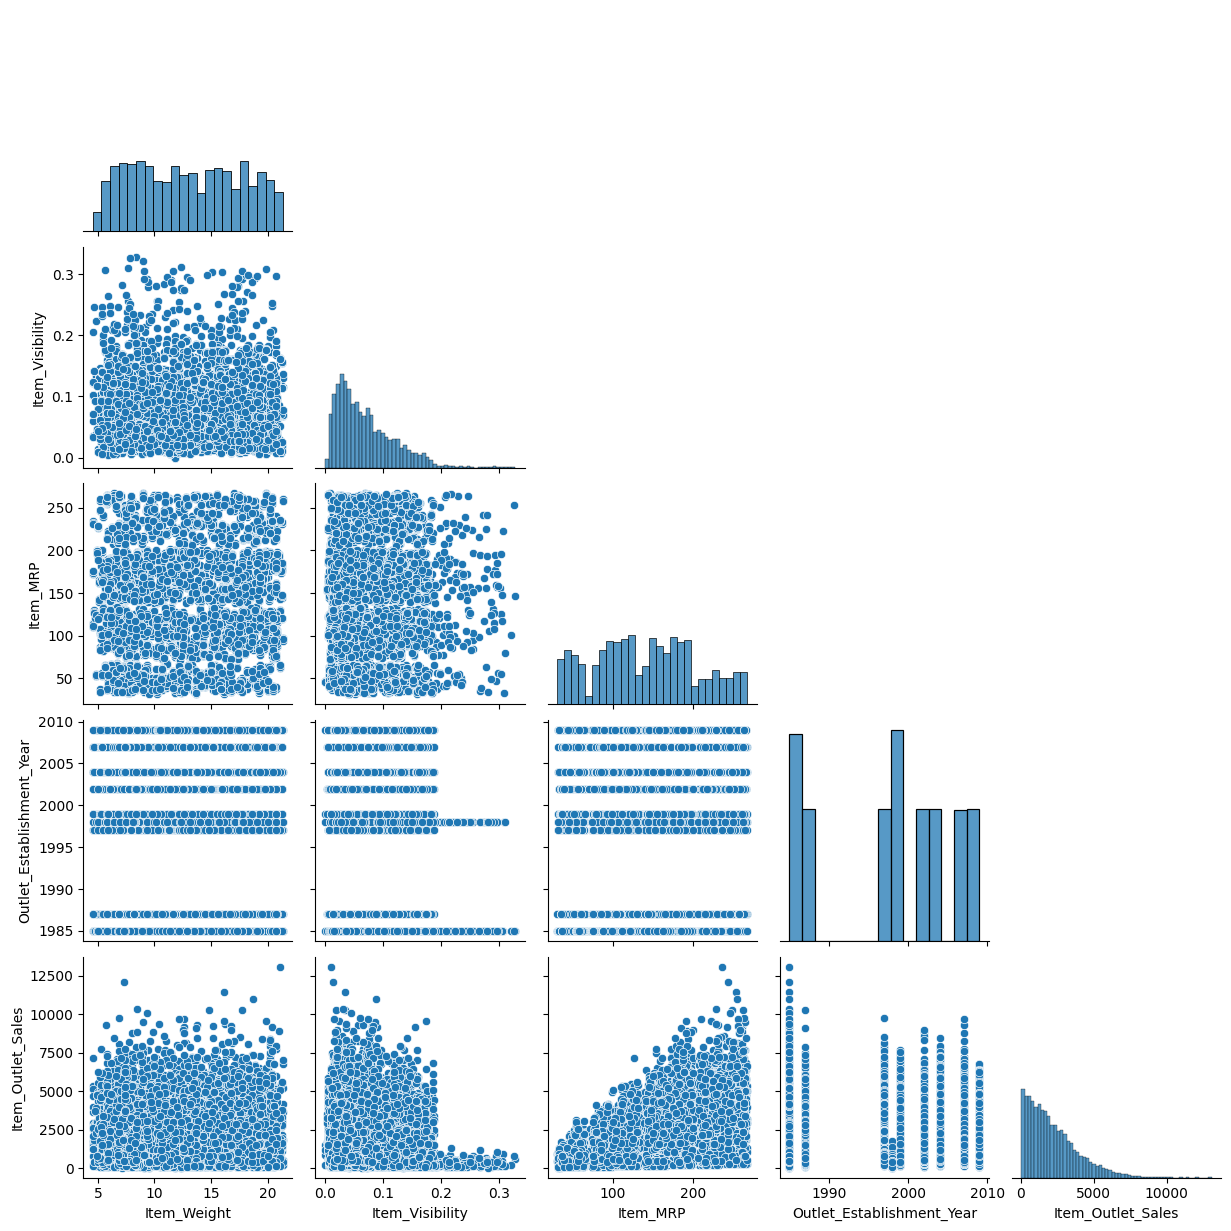

In [37]:
sns.pairplot(train[num_cols],corner=True) # after preprocessing - the graph plot should not change

In [38]:
train.to_csv('train_preprocessed.csv',index=False)
test.to_csv('test_preprocessed.csv',index=False)

In [39]:
#corelation graph for numerical columns
#Ratios & interaction proportions #Both 1 or multiple columns
#Aggregated Statistical Features
#Non-Linear Transformations #optional
#Encoding


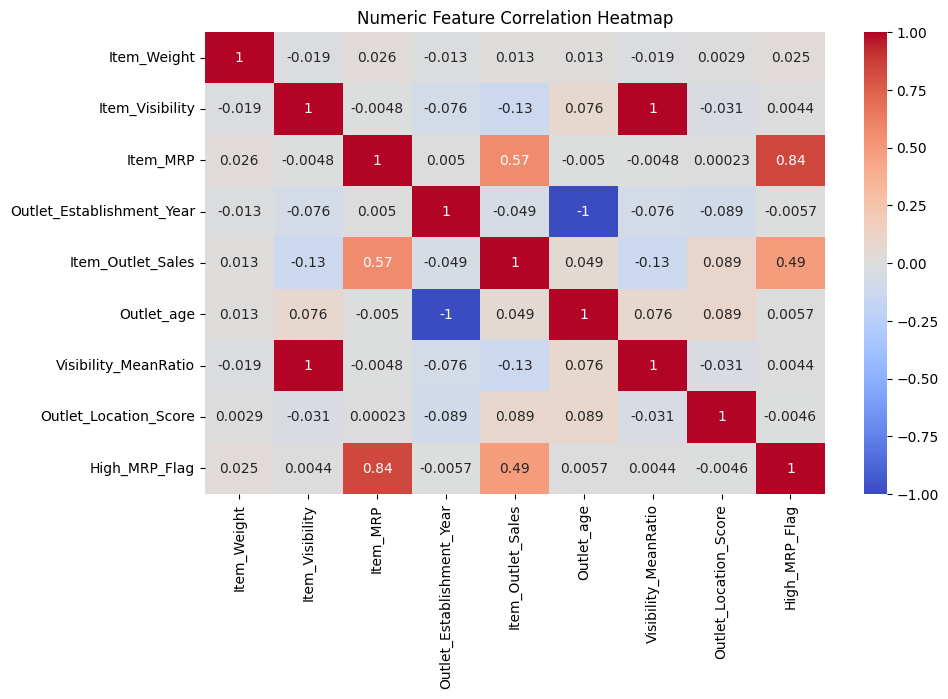

In [40]:
# Correlation heatmap (numeric features) Pearson Coefficent
num_cols = train.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10,6))
sns.heatmap(train[num_cols].corr(), cmap='coolwarm', annot=True)
plt.title("Numeric Feature Correlation Heatmap")
plt.show()

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

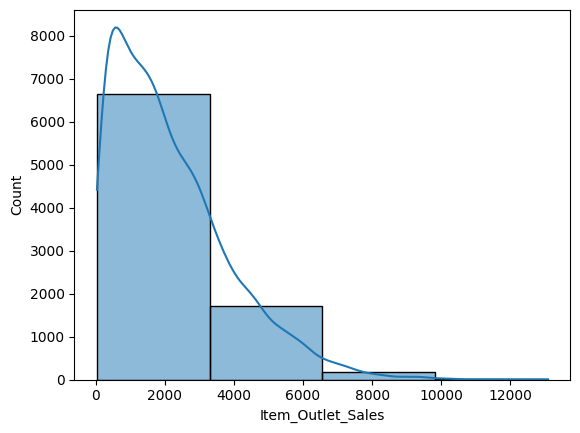

In [41]:
sns.histplot(train['Item_Outlet_Sales'],kde = True,bins=4)

In [42]:
# Chi-square test for categorical vs target
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

cat_cols = train.select_dtypes(exclude=np.number).columns
chi_results = []

#Chi-Square is a test for variance
for c in cat_cols:
    contingency = pd.crosstab(train[c], pd.qcut(train["Item_Outlet_Sales"], q=4)) #4Quartilee
    chi2_stat, p, dof, ex = chi2_contingency(contingency)
    chi_results.append((c, chi2_stat, p))
    #H0 - No association between each categorical variable and binned sales
    #HA - Strong Relationship (p<0.05) reject Null
chi_df = pd.DataFrame(chi_results, columns=["Feature","Chi2","p_value"]).sort_values("p_value")
print("Chi-Square association with Item_Outlet_Sales (lower p = stronger association):")
display(chi_df)

Chi-Square association with Item_Outlet_Sales (lower p = stronger association):


,Feature,Chi2,p_value
3,Outlet_Identifier,3679.210196,0.000000e+00
6,Outlet_Type,3647.922343,0.000000e+00
0,Item_Identifier,7454.138969,1.486821e-132
4,Outlet_Size,478.120972,4.334800e-100
5,Outlet_Location_Type,282.177067,5.372026e-58
7,Item_Category,27.515132,1.159189e-04
2,Item_Type,88.372933,1.204309e-04
1,Item_Fat_Content,5.429388,1.429235e-01


In [43]:
target = "Item_Outlet_Sales"

features = ["Item_Weight",'Item_Visibility','Item_MRP','Outlet_age','Outlet_Location_Score','Item_Type','Item_Category',
            'Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier']

X = train[features]
y = train[target]

X_test = test[features]

num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns

In [44]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_age',
       'Outlet_Location_Score'],
      dtype='object')

In [45]:
cat_cols

Index(['Item_Type', 'Item_Category', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Identifier'],
      dtype='object')

In [46]:
preprocessor = ColumnTransformer([("num",StandardScaler(),num_cols),
                                  ("cat", OneHotEncoder(handle_unknown="ignore", drop='first',sparse_output=False),cat_cols)])
lin_pipe = Pipeline([('prep',preprocessor),
                     ('model',LinearRegression())])

In [47]:
lin_pipe.fit(X,y) #Gradient descent is happening here..!
y_pred = lin_pipe.predict(X)

In [49]:
r2 = r2_score(y,y_pred)
rmse = np.sqrt(mean_squared_error(y,y_pred))

In [50]:
r2 #tells us how much of variance in my target is explained by my model

0.5636142440883256

In [51]:
rmse #Train Metrics.. I will show X_test in sometime

np.float64(1127.2389810354182)

In [52]:
preds = lin_pipe.predict(X_test)

preds = np.clip(preds,0,None)

submission = pd.DataFrame({'Item_Identifier':test['Item_Identifier'],
                           'Outlet_Identifier':test['Outlet_Identifier'],
                           'Item_Outlet_Sales': preds})

submission.to_csv("Submission_LR_CF.csv",index=False)

In [53]:
from sklearn.linear_model import SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False), cat_cols)
])

# SGD Regressor Model
sgd_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", SGDRegressor(
        loss="squared_error",   # classic linear regression loss
        penalty="l2",           # ridge regularization
        alpha=0.0001,           # regularization strength
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ))
])

In [54]:
sgd_pipe.fit(X, y)

# Predictions
y_pred = sgd_pipe.predict(X)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"Training RMSE: {rmse:.2f}")
print(f"Training R²: {r2:.4f}")


Training RMSE: 1128.18
Training R²: 0.5629


In [56]:
# Predict on test set
test_preds = sgd_pipe.predict(X_test)
test_preds = np.clip(test_preds,0,None)
# Prepare submission
submission = pd.DataFrame({
    "Item_Identifier": test["Item_Identifier"],
    "Outlet_Identifier": test["Outlet_Identifier"],
    "Item_Outlet_Sales": test_preds
})

submission.to_csv("submission_sgd.csv", index=False)
print("✅ Submission file 'submission_sgd.csv' created successfully!")


✅ Submission file 'submission_sgd.csv' created successfully!


In [57]:
import joblib

# Assuming your trained model is called 'lin_pipe' or 'sgd_pipe'
joblib.dump(lin_pipe, "bigmart_model.pkl")

print("✅ Model saved successfully as 'bigmart_model.pkl'")

✅ Model saved successfully as 'bigmart_model.pkl'


In [58]:
coefs = lin_pipe.named_steps['model'].coef_
intercept = lin_pipe.named_steps['model'].intercept_

In [ ]:
intercept

np.float64(872.3028803654533)

In [ ]:
feature_names = lin_pipe.named_steps['prep'].get_feature_names_out()

In [ ]:
feature_names

array(['num__Item_Weight', 'num__Item_Visibility', 'num__Item_MRP',
       'num__Outlet_age', 'num__Outlet_Location_Score',
       'cat__Item_Type_Breads', 'cat__Item_Type_Breakfast',
       'cat__Item_Type_Canned', 'cat__Item_Type_Dairy',
       'cat__Item_Type_Frozen Foods',
       'cat__Item_Type_Fruits and Vegetables',
       'cat__Item_Type_Hard Drinks', 'cat__Item_Type_Health and Hygiene',
       'cat__Item_Type_Household', 'cat__Item_Type_Meat',
       'cat__Item_Type_Others', 'cat__Item_Type_Seafood',
       'cat__Item_Type_Snack Foods', 'cat__Item_Type_Soft Drinks',
       'cat__Item_Type_Starchy Foods', 'cat__Item_Category_FD',
       'cat__Item_Category_NC', 'cat__Outlet_Size_Medium',
       'cat__Outlet_Size_Small', 'cat__Outlet_Location_Type_Tier 2',
       'cat__Outlet_Location_Type_Tier 3',
       'cat__Outlet_Type_Supermarket Type1',
       'cat__Outlet_Type_Supermarket Type2',
       'cat__Outlet_Type_Supermarket Type3',
       'cat__Outlet_Identifier_OUT013', 'cat__Ou

In [ ]:
equation = "Sales = " + str(round(intercept,2))
for f,c in zip(feature_names,coefs):
  equation += f'+({c:.2f} *{f})'

In [ ]:
equation

'Sales = 872.3+(-2.50 *num__Item_Weight)+(-11.87 *num__Item_Visibility)+(969.54 *num__Item_MRP)+(176.53 *num__Outlet_age)+(-101.50 *num__Outlet_Location_Score)+(3.15 *cat__Item_Type_Breads)+(11.54 *cat__Item_Type_Breakfast)+(24.53 *cat__Item_Type_Canned)+(-50.68 *cat__Item_Type_Dairy)+(-28.72 *cat__Item_Type_Frozen Foods)+(29.68 *cat__Item_Type_Fruits and Vegetables)+(-45.96 *cat__Item_Type_Hard Drinks)+(-3.84 *cat__Item_Type_Health and Hygiene)+(-33.01 *cat__Item_Type_Household)+(4.10 *cat__Item_Type_Meat)+(-14.99 *cat__Item_Type_Others)+(181.63 *cat__Item_Type_Seafood)+(-14.29 *cat__Item_Type_Snack Foods)+(-66.79 *cat__Item_Type_Soft Drinks)+(19.93 *cat__Item_Type_Starchy Foods)+(-25.85 *cat__Item_Category_FD)+(-51.84 *cat__Item_Category_NC)+(-132.35 *cat__Outlet_Size_Medium)+(-199.19 *cat__Outlet_Size_Small)+(389.38 *cat__Outlet_Location_Type_Tier 2)+(-235.94 *cat__Outlet_Location_Type_Tier 3)+(1243.65 *cat__Outlet_Type_Supermarket Type1)+(931.49 *cat__Outlet_Type_Supermarket Type2)

In [ ]:
# groupby median for Item_Visibility with a new column
#train['Item_Visibility_Median'] = train['Item_Visibility'].groupby(train['Item_Identifier']).transform('median')

#train['Item_Visibility'].groupby(train['Item_Visibility']).mean()
#grouped_mean = train['Item_Weight'].groupby(train['Item_Identifier']).mean()
#grouped_mean = train.groupby('Item_Identifier')['Item_Weight'].transform('mean')
#print(grouped_mean)
#train("Item_Mean_Weight") = train.groupby('Item_Identifier')['Item_Weight'].transform('mean')
#train.loc[train['Item_Outlet_Sales'] <= 4500].shape
#filter dataframes where the column contains a specific value

#train['Item_Mean_Weight'] = train.groupby('Item_Identifier')['Item_Weight'].transform('mean')
#calculate median for Item_Visibility group by Item_Identifier
#train['Item_Median_Visibility'] = train.groupby('Item_Identifier')['Item_Visibility'].transform('median')
#train = train.groupby('Item_Identifier')['Item_Visibility'].transform('median')
#print(test.head(10))
#train
#train['Item_Mode_LocType'] = train.groupby('Outlet_Identifier')['Outlet_Location_Type'].transform('mode')
#find mode for Outlet_Size using groupby Outlet_Location_Type, outlet_Type and create a new column in the dataframe
#train['Outlet_Size_Mode'] = train.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Outlet_Size'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
#= train.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Outlet_Size'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
#train['Outlet_Size'].fillna(train.groupby('Outlet_Location_Type, Outlet_Type')['Outlet_Size'].transform('mode'), inplace=True)
train['Outlet_Size_Mode'] = train.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Outlet_Size'] \
                           .transform(lambda x: x.mode()[0] if not x.mode().empty else train['Outlet_Size'].mode()[0])
#print("\nAverage Quantity by Region, Product, and Month:")
train.head(100)







,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_Mode
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Medium
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Medium
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Medium
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Medium
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,High
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Medium
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,High
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Medium
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,Small
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,Small


In [59]:
train.head(100)



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_age,Visibility_MeanRatio,Outlet_Location_Score,High_MRP_Flag
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14,0.228598,1,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4,0.274624,3,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14,0.238752,1,0
3,FDX07,19.20,Regular,0.022861,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,15,0.325664,3,1
4,NCD19,8.93,Low Fat,0.006590,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26,0.093872,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,FDU04,7.93,Low Fat,0.009715,Frozen Foods,120.0414,OUT019,1985,Small,Tier 1,Grocery Store,487.3656,FD,28,0.138387,1,0
96,FDF41,12.15,Low Fat,0.131384,Frozen Foods,246.0460,OUT049,1999,Medium,Tier 1,Supermarket Type1,1231.7300,FD,14,1.871599,1,1
97,FDB56,8.75,Regular,0.074613,Fruits and Vegetables,187.4556,OUT035,2004,Small,Tier 2,Supermarket Type1,3755.1120,FD,9,1.062885,2,1
98,NCP18,12.15,Low Fat,0.028460,Household,149.9708,OUT027,1985,Medium,Tier 3,Supermarket Type3,4363.6532,NC,28,0.405417,3,1


In [60]:
from sklearn.preprocessing import PolynomialFeatures

preprocessor = ColumnTransformer([("num",StandardScaler(),num_cols),
                                  ("categorical", OneHotEncoder(handle_unknown="ignore", drop='first',sparse_output=False),cat_cols)])

pipe_full = Pipeline([
    ('preproc', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])


In [61]:
pipe_full.fit(X, y)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_age',
       'Outlet_Location_Score'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Item_Type', 'Item_Category', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Identifier'],
      dtype='object'))])),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [63]:
y_pred = pipe_full.predict(X)

In [65]:
r2 = r2_score(y,y_pred)
rmse = np.sqrt(mean_squared_error(y,y_pred))

In [67]:
r2

0.6179328548116825

In [68]:
rmse

np.float64(1054.7524970121717)

In [69]:
test_preds = pipe_full.predict(X_test)
test_preds = np.clip(test_preds,0,None)
# Prepare submission
submission = pd.DataFrame({
    "Item_Identifier": test["Item_Identifier"],
    "Outlet_Identifier": test["Outlet_Identifier"],
    "Item_Outlet_Sales": test_preds
})

submission.to_csv("submission_Poly_LR.csv", index=False)
print("✅ Submission file 'submission_Poly_LR.csv' created successfully!")

✅ Submission file 'submission_Poly_LR.csv' created successfully!
